In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, auc, roc_auc_score

In [2]:
df1 = pd.read_csv('ido_des_rfe.csv')
df1

,SPS,MaxPartialCharge,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,...,fr_Al_OH_noTert,fr_Ar_N,fr_alkyl_halide,fr_allylic_oxid,fr_amidine,fr_aniline,fr_benzene,fr_bicyclic,fr_nitro_arom,fr_phenol
0,12.550000,0.265850,2.700000,19.142144,10.127063,2.299512,-2.044396,2.261446,-2.208844,6.128878,...,0,2,0,0,0,0,2,4,0,0
1,18.434783,0.237258,2.565217,79.918731,9.689645,2.398429,-2.343136,2.456021,-2.290252,9.102221,...,0,0,0,0,0,0,1,5,0,0
2,12.550000,0.265850,2.700000,35.495691,10.132462,2.297007,-2.048598,2.279796,-2.209103,6.308218,...,0,2,0,0,0,0,2,4,0,0
3,11.500000,0.141781,2.000000,16.255462,10.000957,2.141598,-2.047437,2.359146,-1.806567,6.230784,...,0,2,0,0,0,0,4,6,0,1
4,10.466667,0.315479,2.933333,19.142178,10.148065,2.197032,-2.011632,2.337199,-1.924037,5.879114,...,0,1,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,23.684211,0.067149,3.052632,79.918731,9.862968,2.226436,-2.278160,2.315568,-2.298871,9.103720,...,1,2,0,0,0,1,1,1,0,0
753,19.941176,0.068191,3.235294,79.918731,10.166196,2.137116,-2.130987,2.264178,-2.288191,9.103039,...,0,2,0,0,0,1,1,1,0,0
754,18.391304,0.237313,2.652174,16.336776,9.689526,2.394416,-2.343290,2.442968,-2.291534,6.529263,...,1,0,0,0,0,0,1,5,0,0
755,11.555556,0.202775,2.833333,35.495692,10.262000,2.149948,-2.058385,2.199052,-2.155373,6.306904,...,0,2,0,0,1,2,1,0,0,0


In [3]:
df2 = pd.read_csv('target2_columns.csv')
df2

,ido_ic50,tdo_ic50
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
752,0.0,0.0
753,0.0,0.0
754,0.0,1.0
755,1.0,0.0


In [4]:
df2['tdo_ic50'] = df2['tdo_ic50'].astype('category')
df2['ido_ic50'] = df2['ido_ic50'].astype('category')

In [6]:
x = df1
y = df2.loc[:, 'ido_ic50']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2268741)
x_test.shape

(152, 50)

In [7]:
from sklearn.model_selection import GridSearchCV

In [21]:
model = RandomForestClassifier()
params = {'criterion': ['gini', 'entropy'],  'max_depth': list(range(3, 20)), 'max_features': ['sqrt', 'log2', None], 'bootstrap': [True, False]}
grid = GridSearchCV(model, params, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_features': ['sqrt', 'log2', None]})

In [22]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16)

In [23]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'sqrt'}

In [24]:
model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16)

In [25]:
np.mean(cross_val_score(model, x_train, y_train, cv=5))

0.8661157024793388

In [26]:
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.7832258064516129

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16)

In [28]:
model.score(x_train, y_train)

0.996694214876033

In [29]:
model.score(x_test, y_test)

0.8486842105263158

In [30]:
py_train = model.predict(x_train)

In [31]:
py_test = model.predict(x_test)

In [32]:
print(classification_report(y_train, py_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       295
         1.0       1.00      1.00      1.00       310

    accuracy                           1.00       605
   macro avg       1.00      1.00      1.00       605
weighted avg       1.00      1.00      1.00       605



In [33]:
print(classification_report(y_test, py_test))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86        83
         1.0       0.81      0.87      0.84        69

    accuracy                           0.85       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.85      0.85      0.85       152



In [34]:
roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])

0.9999726626571898

In [35]:
roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

0.9197660206041558

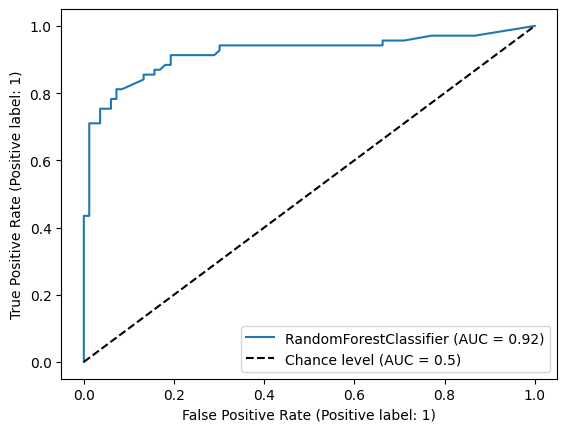

In [36]:
RocCurveDisplay.from_estimator(model, x_test, y_test, plot_chance_level=True, pos_label=1);

In [39]:
model.feature_importances_.argmax()

7

In [46]:
x.columns[7]

'BCUT2D_LOGPHI'

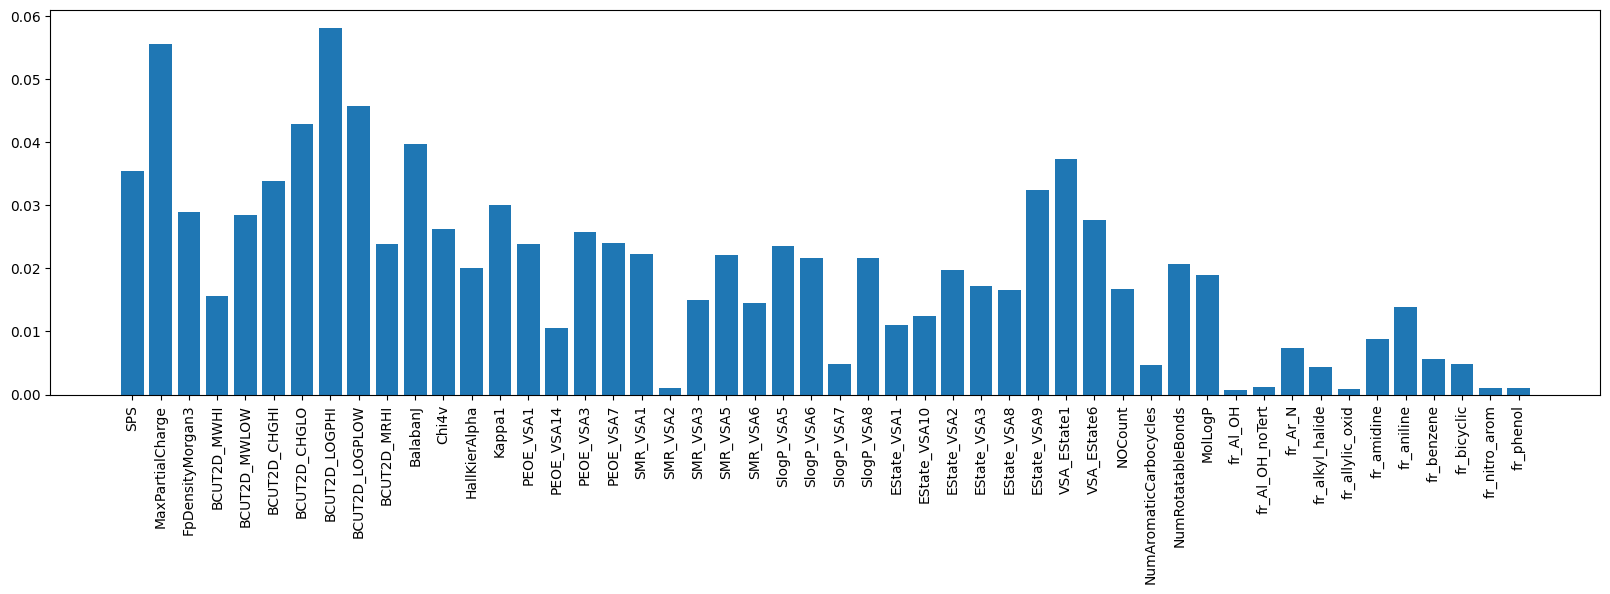

In [43]:
plt.figure(figsize=(20, 5))
plt.bar(x.columns, model.feature_importances_, )
plt.xticks(x.columns, rotation=90);

In [44]:
f = model.feature_importances_ > 0.04
x.columns[f]

Index(['MaxPartialCharge', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW'], dtype='object')

Text(0.5, 1.0, 'Feature importance for IDO')

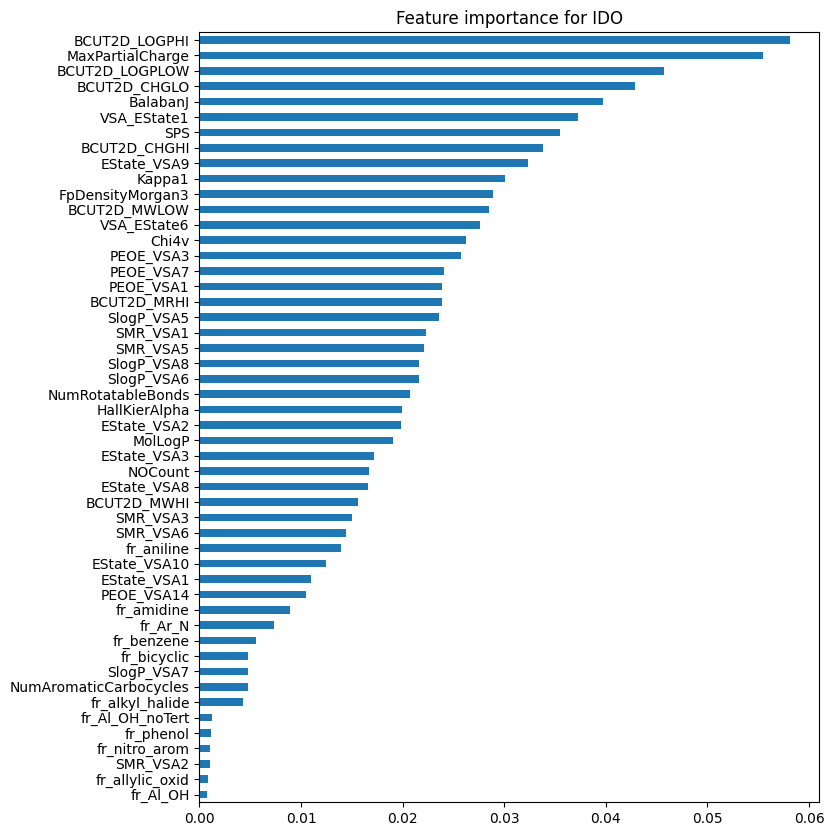

In [45]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.feature_importances_, index = x.columns)
imp_coef = coef.sort_values()
#plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance for IDO")

In [72]:
df3 = pd.read_csv('tdo_des_rfe.csv')
df3

,qed,MaxPartialCharge,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BalabanJ,Chi0v,Chi3n,Chi3v,Kappa3,...,fr_Ar_NH,fr_NH2,fr_Nhpyrrole,fr_amide,fr_amidine,fr_ether,fr_furan,fr_pyridine,fr_thiophene,fr_urea
0,0.489318,0.265850,1.850000,2.700000,19.142144,2.196267,10.130340,3.422924,3.422924,1.261965,...,0,0,0,0,0,0,0,0,0,0
1,0.610144,0.237258,1.826087,2.565217,79.918731,2.078932,14.964727,5.264118,6.020737,1.874356,...,0,0,0,0,0,0,1,0,0,0
2,0.498010,0.265850,1.850000,2.700000,35.495691,2.213612,10.886269,3.424103,3.659200,1.338652,...,0,0,0,0,0,0,0,0,0,0
3,0.415814,0.141781,1.250000,2.000000,16.255462,1.978942,12.822630,4.531742,4.531742,1.752740,...,1,0,1,0,0,0,0,0,0,0
4,0.573824,0.315479,2.266667,2.933333,19.142178,2.903274,7.345503,1.992077,1.992077,1.354345,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.811838,0.067149,2.210526,3.052632,79.918731,1.771904,12.280673,3.983299,4.644131,2.623076,...,1,0,1,0,0,0,0,0,0,0
753,0.815194,0.068191,2.411765,3.235294,79.918731,1.805917,11.049003,3.224730,3.682568,2.301831,...,1,0,1,0,0,0,0,0,0,0
754,0.819410,0.237313,1.913043,2.652174,16.336776,2.042118,13.232436,5.213113,5.213113,1.814473,...,0,0,0,0,0,0,1,0,0,0
755,0.331791,0.202775,2.277778,2.833333,35.495692,2.267862,9.518362,2.020549,2.310195,2.325159,...,0,1,0,0,1,0,0,0,0,0


In [73]:
x = df3
y = df2.loc[:, 'tdo_ic50']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2269941)
x_test.shape

(152, 50)

In [50]:
model = RandomForestClassifier()
params = {'criterion': ['gini', 'entropy'],  'max_depth': list(range(3, 20)), 'max_features': ['sqrt', 'log2', None], 'bootstrap': [True, False]}
grid = GridSearchCV(model, params, cv=10, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_features': ['sqrt', 'log2', None]})

In [51]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2')

In [52]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2'}

In [74]:
model = RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2')

In [75]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2')

In [76]:
model.score(x_train, y_train)

0.9834710743801653

In [77]:
model.score(x_test, y_test)

0.8486842105263158

In [78]:
yp_train = model.predict(x_train)

In [79]:
yp_test = model.predict(x_test)

In [80]:
print(classification_report(y_train, yp_train))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       378
         1.0       0.96      1.00      0.98       227

    accuracy                           0.98       605
   macro avg       0.98      0.99      0.98       605
weighted avg       0.98      0.98      0.98       605



In [81]:
print(classification_report(y_test ,yp_test))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        92
         1.0       0.84      0.77      0.80        60

    accuracy                           0.85       152
   macro avg       0.85      0.83      0.84       152
weighted avg       0.85      0.85      0.85       152



In [82]:
np.mean(cross_val_score(model, x_train, y_train, cv=5))

0.8016528925619835

In [83]:
np.mean(cross_val_score(model, x_test, y_test, cv=5))

0.8090322580645161

In [84]:
roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])

0.999423117264527

In [85]:
roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

0.9103260869565218

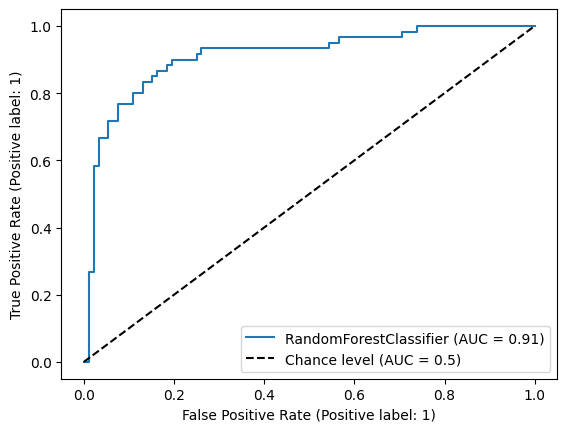

In [86]:
RocCurveDisplay.from_estimator(model, x_test, y_test, plot_chance_level=True, pos_label=1);

Text(0.5, 1.0, 'Feature importance for TDO')

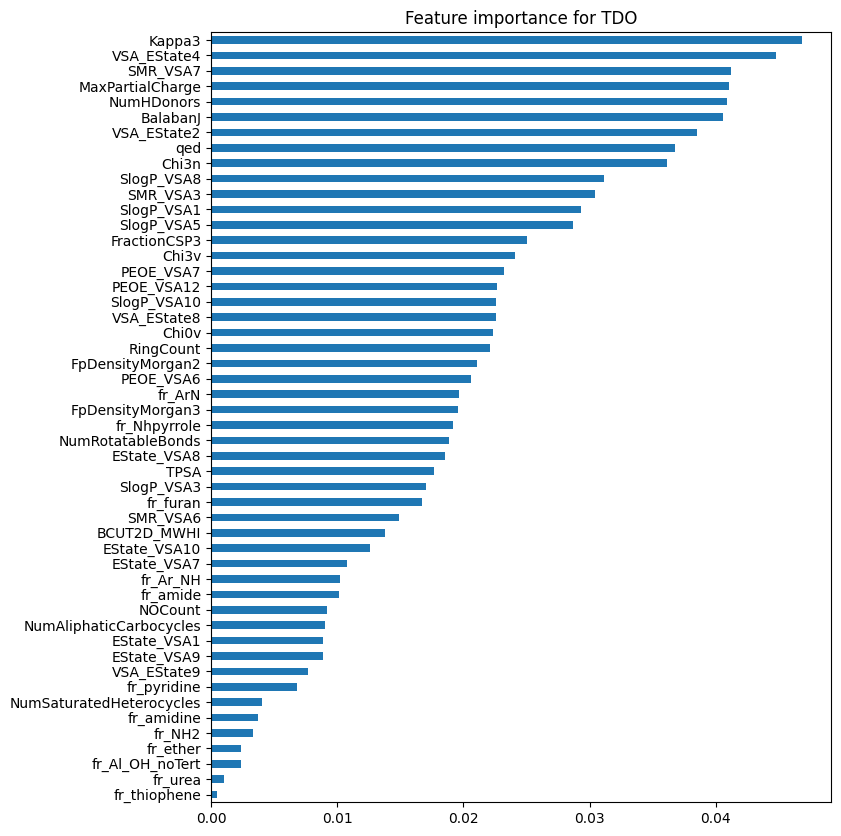

In [88]:
plt.figure(figsize=(8,10))
coef = pd.Series(model.feature_importances_, index = x.columns)
imp_coef = coef.sort_values()
#plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance for TDO")